In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib

In [11]:
dirctl='/dhobyghaut/grandey/data5/cesm/s2s/'
pptcu2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECC.nc')
pptcl2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECL.nc')
# print(pptcu2k)
pptcueas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECC.nc')
pptcleas0=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.PRECL.nc')

# wind=xr.open_dataset(dirctl+'p17d_b_eas0/atm/')
#ppt data is in m/s. convert to mm/day *60*60*24*1000 = *86400000
units=60*60*24*1000
#latmin=-8.30
#latmax=33.98
latmin=2.92
latmax=24.18
lonmin=81.9 #80.66
lonmax=124.17 #125.42
starttime=12*40
#comment out this section below if you want global data
pptcl2k=pptcl2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcu2k=pptcu2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcleas0=pptcleas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcueas0=pptcueas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
#comment out section above if you want global data
t,nlat,nlon=np.shape(pptcl2k.PRECL)
lons=pptcl2k.lon
lats=pptcl2k.lat



/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


<xarray.DataArray 'lat' (lat: 22)>
array([ -6.631579,  -4.736842,  -2.842105,  -0.947368,   0.947368,   2.842105,
         4.736842,   6.631579,   8.526316,  10.421053,  12.315789,  14.210526,
        16.105263,  18.      ,  19.894737,  21.789474,  23.684211,  25.578947,
        27.473684,  29.368421,  31.263158,  33.157895])
Coordinates:
  * lat      (lat) float64 -6.632 -4.737 -2.842 -0.9474 0.9474 2.842 4.737 ...
Attributes:
    long_name:  latitude
    units:      degrees_north
<xarray.DataArray 'lon' (lon: 18)>
array([  82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,  100. ,  102.5,
        105. ,  107.5,  110. ,  112.5,  115. ,  117.5,  120. ,  122.5,  125. ])
Coordinates:
  * lon      (lon) float64 82.5 85.0 87.5 90.0 92.5 95.0 97.5 100.0 102.5 ...
Attributes:
    long_name:  longitude
    units:      degrees_east
480


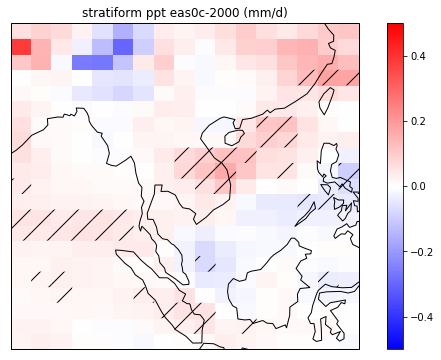

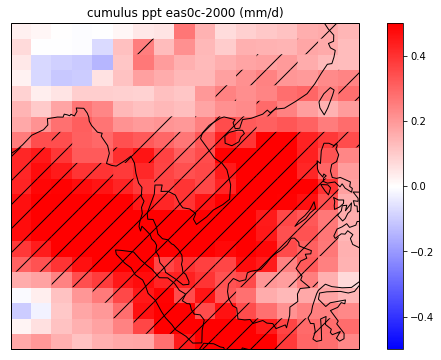

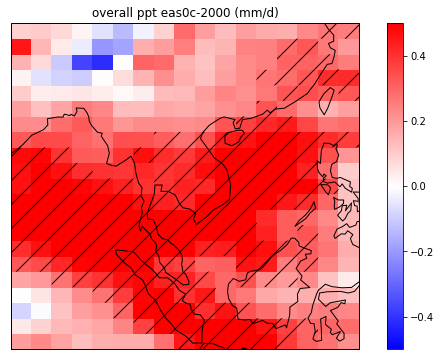

In [7]:
print(pptcu2k.lat)
print(pptcueas0.lon)
print(starttime)


t1,p1 = ttest_ind(pptcleas0.PRECL[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0.PRECC[starttime:,:,:],pptcu2k.PRECC[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:],pptcl2k.PRECL[starttime:,:,:]+pptcu2k.PRECC[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)


plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
plt.figure(1)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcl2k.lon,pptcl2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('stratiform ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp1, hatch='/', alpha=0.)

plt.figure(2)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcueas0.PRECC[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('cumulus ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp2, hatch='/', alpha=0.)


plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(pptcu2k.lon,pptcu2k.lat,np.mean(pptcleas0.PRECL[starttime:,:,:]+pptcueas0.PRECC[starttime:,:,:]-pptcl2k.PRECL[starttime:,:,:]-pptcu2k.PRECC[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('overall ppt eas0c-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(pptcu2k.lon, pptcu2k.lat, pp3, hatch='/', alpha=0.)
# plt.figtext(.02, .02, 'domain mean is {}'.format(np.mean(pptcleas0.PRECL+pptcueas0.PRECC-pptcl2k.PRECL-pptcu2k.PRECC)))
plt.show()

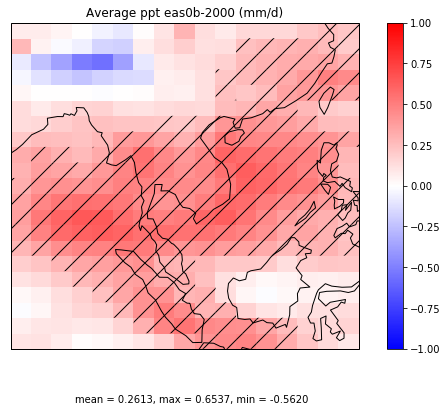

In [8]:
#seasonal outputs. 0=jan ... 11=dec

pptcl2ka=pptcl2k.PRECL.data.reshape((-1,12,nlat,nlon))
pptcl2kb=pptcl2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcu2ka=pptcu2k.PRECC.data.reshape((-1,12,nlat,nlon))
pptcu2kb=pptcu2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcleas0a=pptcleas0.PRECL.data.reshape((-1,12,nlat,nlon))
pptcleas0b=pptcleas0a[:,:,:,:].reshape((-1,nlat,nlon))
pptcueas0a=pptcueas0.PRECC.data.reshape((-1,12,nlat,nlon))
pptcueas0b=pptcueas0a[:,:,:,:].reshape((-1,nlat,nlon))

#ignore transient period 3*40yrs
starttime=120

t1,p1 = ttest_ind(pptcleas0b[starttime:,:,:],pptcl2kb[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0b[starttime:,:,:],pptcu2kb[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:],pptcl2kb[starttime:,:,:]+pptcu2kb[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)

# plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
# plt.figure(1)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcleas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('stratiform ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp1, hatch='/', alpha=0.)

# plt.figure(2)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcueas0b[starttime:,:,:]-pptcu2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('cumulus ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp2, hatch='/', alpha=0.)

netdiff=pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:]-pptcu2kb[starttime:,:,:]
plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,np.mean(netdiff,axis=0)*units,cmap='bwr',vmax=1,vmin=-1)
ax=plt.gca()
ax.set_title('Average ppt eas0b-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(lons, lats, pp3, hatch='/', alpha=0.)
plt.figtext(0.35,0,'mean = {:.4f}, max = {:.4f}, min = {:.4f}'.format(units*np.mean(netdiff),\
                                                     units*np.max(np.mean(netdiff,axis=0)),\
                                                     units*np.min(np.mean(netdiff,axis=0))))
plt.show()

# Comparison with wrf downscalling

(60, 11, 17)
<xarray.DataArray ()>
array(1.6976815144617086)
Coordinates:
    time     datetime64[ns] 1843-08-31 <xarray.DataArray ()>
array(3.8328347472683277)
Coordinates:
    time     datetime64[ns] 1843-08-31 <xarray.DataArray 'PPT' ()>
array(3.0232328733451843)
Coordinates:
    time     datetime64[ns] 1990-01-31 <xarray.DataArray 'PPT' ()>
array(24.999256912970896)
Coordinates:
    time     datetime64[ns] 1990-01-31


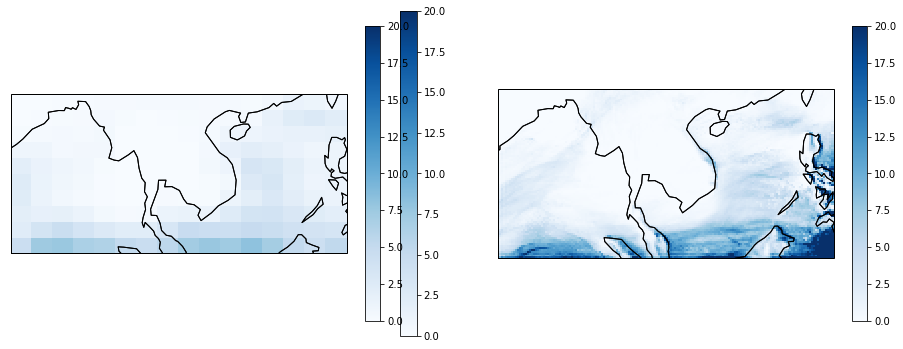

<xarray.DataArray ()>
array(nan)
Coordinates:
    time     datetime64[ns] 1843-09-30 <xarray.DataArray ()>
array(nan)
Coordinates:
    time     datetime64[ns] 1843-09-30 <xarray.DataArray 'PPT' ()>
array(1.1115226069446673)
Coordinates:
    time     datetime64[ns] 1990-02-28 <xarray.DataArray 'PPT' ()>
array(3.4846083061828654)
Coordinates:
    time     datetime64[ns] 1990-02-28


/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


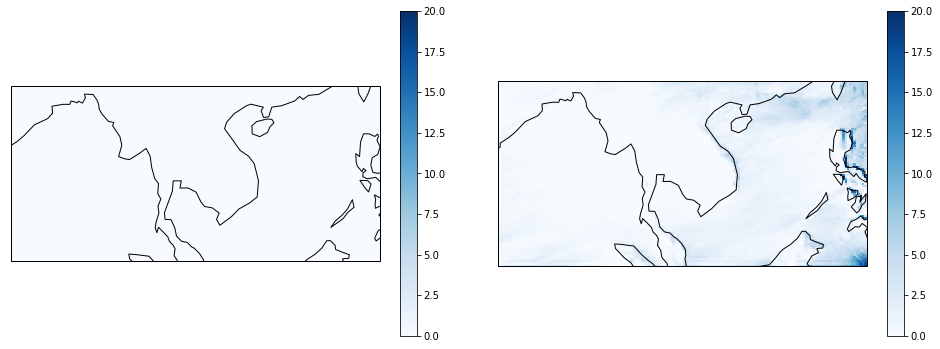

<xarray.DataArray ()>
array(0.8021575454998037)
Coordinates:
    time     datetime64[ns] 1843-10-31 <xarray.DataArray ()>
array(0.4679810362068839)
Coordinates:
    time     datetime64[ns] 1843-10-31 <xarray.DataArray 'PPT' ()>
array(0.9487792671827933)
Coordinates:
    time     datetime64[ns] 1990-03-31 <xarray.DataArray 'PPT' ()>
array(2.6194866201840994)
Coordinates:
    time     datetime64[ns] 1990-03-31


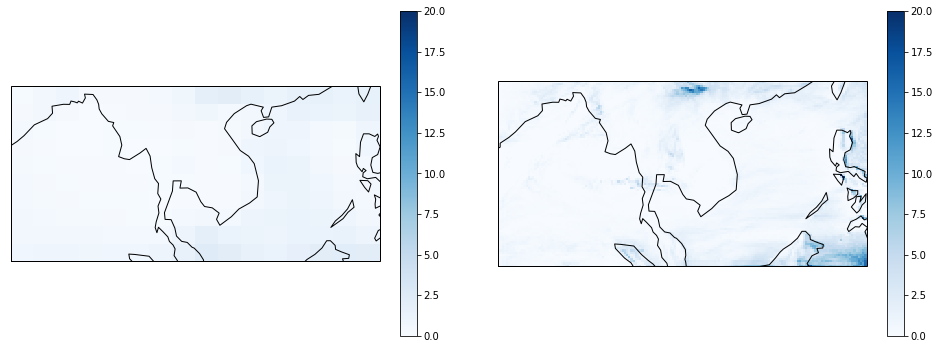

<xarray.DataArray ()>
array(1.2117183765631787)
Coordinates:
    time     datetime64[ns] 1843-11-30 <xarray.DataArray ()>
array(1.6769711405211931)
Coordinates:
    time     datetime64[ns] 1843-11-30 <xarray.DataArray 'PPT' ()>
array(1.64645682437885)
Coordinates:
    time     datetime64[ns] 1990-04-30 <xarray.DataArray 'PPT' ()>
array(6.576556766405386)
Coordinates:
    time     datetime64[ns] 1990-04-30


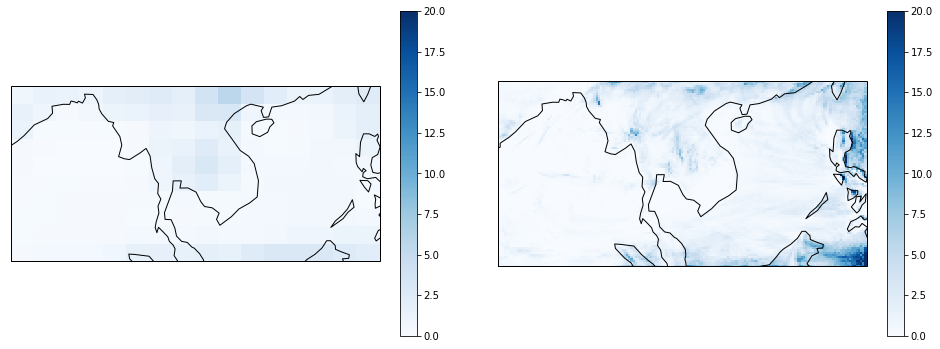

<xarray.DataArray ()>
array(2.4688030124616094)
Coordinates:
    time     datetime64[ns] 1843-12-31 <xarray.DataArray ()>
array(3.3207072835101226)
Coordinates:
    time     datetime64[ns] 1843-12-31 <xarray.DataArray 'PPT' ()>
array(3.899041150257768)
Coordinates:
    time     datetime64[ns] 1990-05-31 <xarray.DataArray 'PPT' ()>
array(27.884316918385192)
Coordinates:
    time     datetime64[ns] 1990-05-31


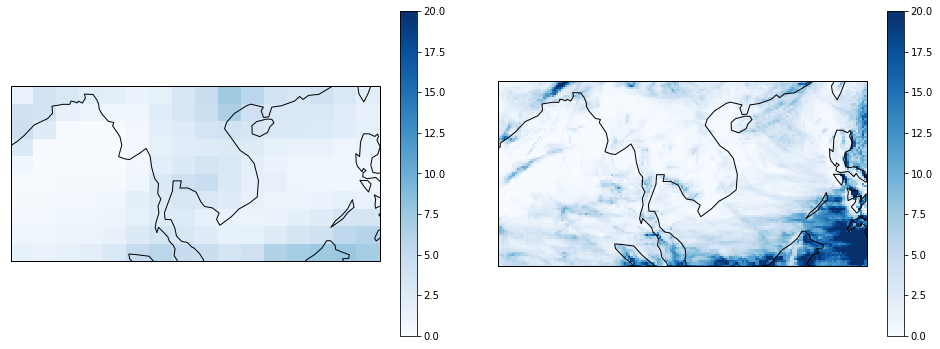

<xarray.DataArray ()>
array(6.080837764855041)
Coordinates:
    time     datetime64[ns] 1844-01-31 <xarray.DataArray ()>
array(10.62313667117038)
Coordinates:
    time     datetime64[ns] 1844-01-31 <xarray.DataArray 'PPT' ()>
array(8.588974767120703)
Coordinates:
    time     datetime64[ns] 1990-06-30 <xarray.DataArray 'PPT' ()>
array(49.05398935046267)
Coordinates:
    time     datetime64[ns] 1990-06-30


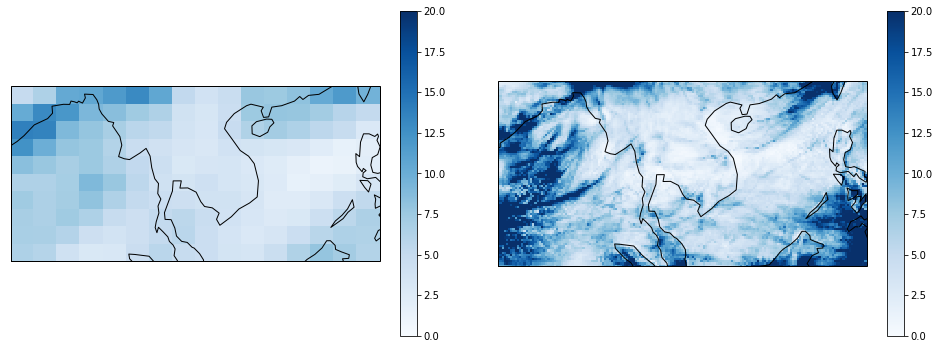

<xarray.DataArray ()>
array(7.114177044957585)
Coordinates:
    time     datetime64[ns] 1844-02-29 <xarray.DataArray ()>
array(7.240745946806774)
Coordinates:
    time     datetime64[ns] 1844-02-29 <xarray.DataArray 'PPT' ()>
array(11.230319532586293)
Coordinates:
    time     datetime64[ns] 1990-07-31 <xarray.DataArray 'PPT' ()>
array(49.96280401970674)
Coordinates:
    time     datetime64[ns] 1990-07-31


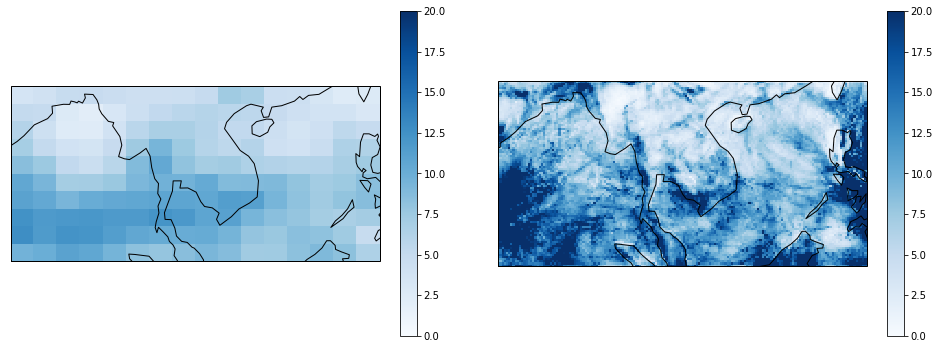

<xarray.DataArray ()>
array(9.261531241532978)
Coordinates:
    time     datetime64[ns] 1844-03-31 <xarray.DataArray ()>
array(14.759851072682444)
Coordinates:
    time     datetime64[ns] 1844-03-31 <xarray.DataArray 'PPT' ()>
array(15.209330423881159)
Coordinates:
    time     datetime64[ns] 1990-08-31 <xarray.DataArray 'PPT' ()>
array(60.20540046640174)
Coordinates:
    time     datetime64[ns] 1990-08-31


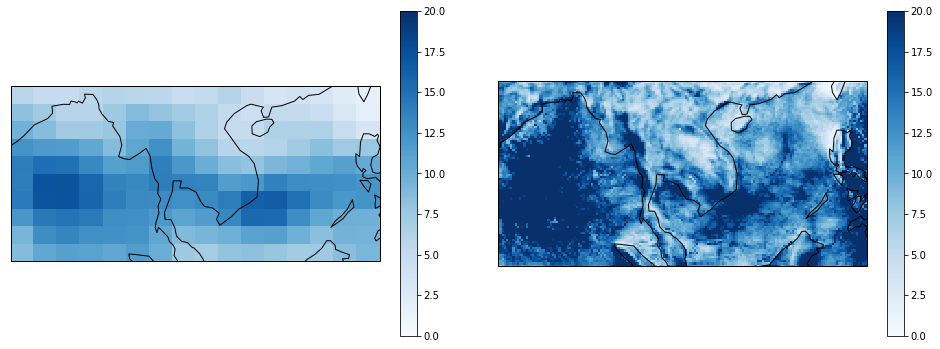

<xarray.DataArray ()>
array(8.149535405030726)
Coordinates:
    time     datetime64[ns] 1844-04-30 <xarray.DataArray ()>
array(6.631975567096798)
Coordinates:
    time     datetime64[ns] 1844-04-30 <xarray.DataArray 'PPT' ()>
array(13.385276206806164)
Coordinates:
    time     datetime64[ns] 1990-09-30 <xarray.DataArray 'PPT' ()>
array(48.63743833005579)
Coordinates:
    time     datetime64[ns] 1990-09-30


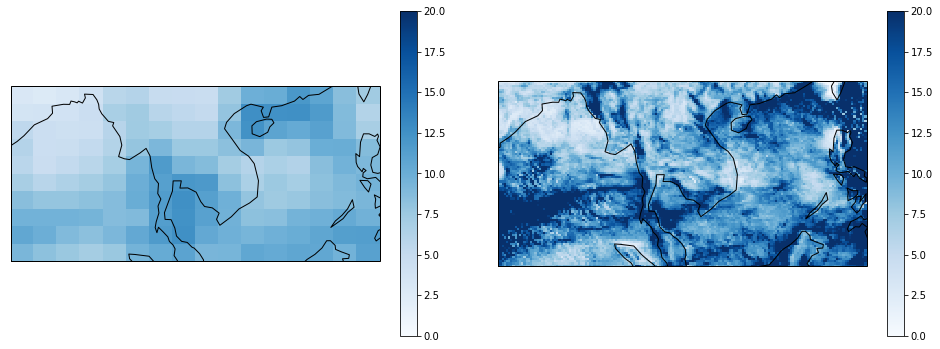

<xarray.DataArray ()>
array(7.5740675942493025)
Coordinates:
    time     datetime64[ns] 1844-05-31 <xarray.DataArray ()>
array(9.65605329473593)
Coordinates:
    time     datetime64[ns] 1844-05-31 <xarray.DataArray 'PPT' ()>
array(12.054883525761056)
Coordinates:
    time     datetime64[ns] 1990-10-31 <xarray.DataArray 'PPT' ()>
array(50.70138334196051)
Coordinates:
    time     datetime64[ns] 1990-10-31


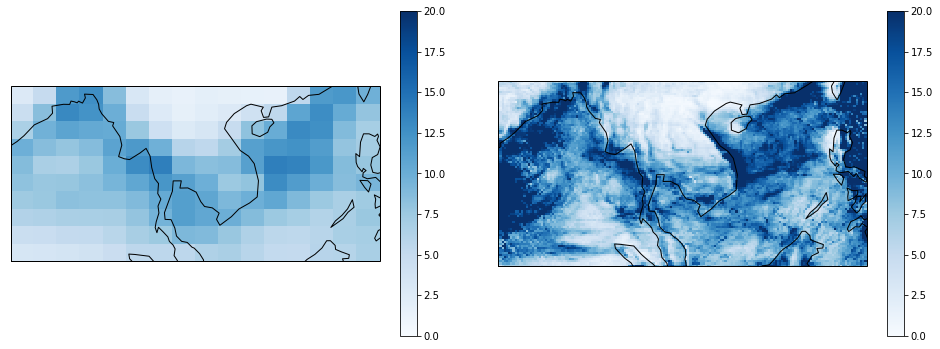

<xarray.DataArray ()>
array(5.884777952566092)
Coordinates:
    time     datetime64[ns] 1844-06-30 <xarray.DataArray ()>
array(20.253862702772135)
Coordinates:
    time     datetime64[ns] 1844-06-30 <xarray.DataArray 'PPT' ()>
array(10.02385272909148)
Coordinates:
    time     datetime64[ns] 1990-11-30 <xarray.DataArray 'PPT' ()>
array(83.8483947301955)
Coordinates:
    time     datetime64[ns] 1990-11-30


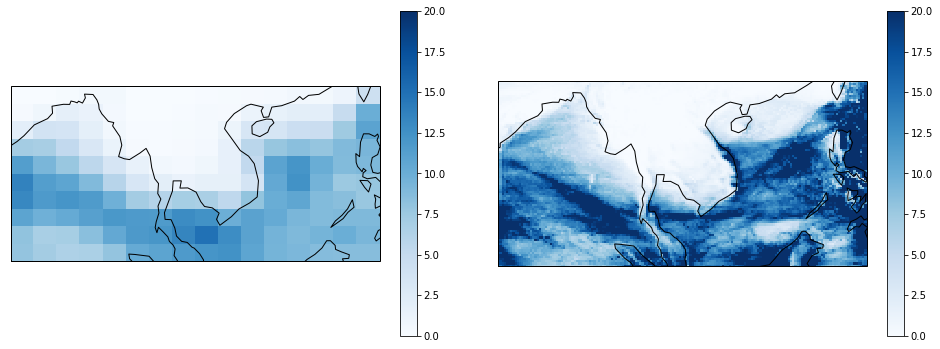

In [71]:
plt.rcParams["figure.figsize"] = 16,8
wrfout=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d01.nc')
wrfppt=wrfout.PPT.resample('1M',dim='time',how='mean')
cesmpptout=pptcu2k.PRECC[89*12:94*12]+pptcl2k.PRECL[89*12:94*12]
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M').to_timestamp()
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
cesmppt=cesmpptoutput.resample('1M',dim='time',how='mean')
print(np.shape(cesmppt))
for tt in range(0,11):
    plt.figure(tt)
    ax1=plt.subplot(1,2,1,projection=ccrs.PlateCarree())
    ax1.pcolor(lons, lats,cesmppt[tt,:,:]*units,vmin=0,vmax=20,cmap='Blues')
    ax1.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    ax2=plt.subplot(1,2,2,projection=ccrs.PlateCarree())
    ax2.pcolor(wrfout.lon,wrfout.lat,wrfppt[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax2.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05)
    print(np.mean(cesmppt[tt,:,:]*units),np.var(cesmppt[tt,:,:]*units),np.mean(wrfppt[tt,:,:]),np.var(wrfppt[tt,:,:]))
    plt.show()

In [68]:

print(cesmpptout)
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M')
timess=timess.to_timestamp()
# print(timess)
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
print(cesmpptoutput)


<xarray.DataArray (time: 60, lat: 11, lon: 17)>
array([[[  5.210526e-08,   8.631764e-08, ...,   6.226972e-08,   9.122224e-08],
        [  2.640589e-08,   4.208907e-08, ...,   4.016912e-08,   5.648607e-08],
        ..., 
        [  3.802048e-10,   6.268231e-10, ...,   8.425056e-09,   5.288226e-09],
        [  1.971630e-10,   3.496047e-10, ...,   1.667534e-09,   2.861187e-09]],

       [[  1.178704e-08,   1.399470e-08, ...,   2.293616e-08,   1.982005e-08],
        [  9.912434e-09,   9.610786e-09, ...,   1.269580e-08,   1.092304e-08],
        ..., 
        [  1.325866e-09,   2.552055e-09, ...,   2.364436e-08,   3.197993e-08],
        [  2.200818e-09,   1.356532e-09, ...,   2.287222e-08,   4.320303e-08]],

       ..., 
       [[  8.544765e-08,   8.556219e-08, ...,   7.978110e-08,   8.947058e-08],
        [  6.746302e-08,   7.443072e-08, ...,   9.880945e-08,   9.740438e-08],
        ..., 
        [  1.044637e-08,   2.889639e-08, ...,   5.727041e-08,   7.433052e-08],
        [  1.430670e-08,

In [ ]:
np.set_printoptions(threshold=np.inf)
# a = np.asarray([i for i in range(24) for _ in range(0)]).reshape((24, 3, 3))
# print(a)
# aa = a.reshape((-1,3,4,3,3))
# print(aa[:,:,2,:,:].reshape((-1,3,3)))
a=np.asarray([i for i in range(24) for _ in range(9)])
aa=a.reshape((24,3,3))
# print(aa)
aaa=aa.reshape((-1,12,3,3))
print(aaa[:,5:8,:,:].reshape((-1,3,3)))